In [1]:
!pip install japanize-matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import japanize_matplotlib
from matplotlib import gridspec
import seaborn as sns

When you use Jap language in matplotlib on colab you must install these modules and when you on others such as conda env. you have other easier ways.

*2 [how to avail jap in matplotlib on colab without character corruption](https://www.teamxeppet.com/matplotlib_in_japanize-colabo/)

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.reset_option('display.float_format')
pd.options.display.float_format = '{:.0f}'.format

*3 click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html) in detail.

#I read the original data, check it and re-organize it if necessary without change its contents. 

In [4]:
dat1=pd.read_table('Cashflow.txt',sep=',',index_col=1)
dat2=pd.read_table('AccountingPolicy.txt',sep=',',index_col=1)
dat3=pd.read_table('Assets&Liabilities.txt',sep=',',index_col=1)
dat4=pd.read_table('BalanceSheet1.txt',sep=',',index_col=1)
dat5=pd.read_table('BalanceSheet2.txt',sep=',',index_col=1)
dat6=pd.read_table('BusinessStatus.txt',sep=',',index_col=1)
dat7=pd.read_table('CompanyOverview.txt',sep=',',index_col=1)
dat8=pd.read_table('FundBalance.txt',sep=',',index_col=1)
dat9=pd.read_table('LongDebtStatement.txt',sep=',',index_col=1)
dat10=pd.read_table('Notes.txt',sep=',',index_col=1)
dat11=pd.read_table('PL.txt',sep=',',index_col=1)
dat12=pd.read_table('Profit appropriation statement.txt',sep=',',index_col=1)
dat13=pd.read_table('Segment.txt',sep=',',index_col=1)
dat14=pd.read_table('ShortDebtStatement.txt',sep=',',index_col=1)
dat15=pd.read_table('Statement_of_Changes_in_ShareholdersEquity.txt',sep=',',index_col=1)
dat16=pd.read_table('SupplementaryDetails.txt',sep=',',index_col=1)
dat17=pd.concat([dat1,dat2,dat3,dat4,dat5,dat6,dat7,dat8,dat9,dat10,dat11,dat12,dat13,dat14,dat15,dat16],axis=1)

C:\Users\IchiroKozakai\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66,206,209,212,215) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


*4 refer to [this](https://realpython.com/pandas-merge-join-and-concat/) as with dataset integration in python/pandas library

In [5]:
l=list(dat17.columns)
l=[col.lstrip('1234567890POIUYTREWQASDFGHJKLMNBVCXZ').lstrip() for col in l]
dat17.columns=l
dat17=dat17.loc[:,~dat17.columns.duplicated()]

These all commands enable us to fix columns name and the first step strips each index code written at the beginning and space. Second step deletes the completely duplicated columns.

*5 [strip functions](https://www.datasciencemadesimple.com/strip-lstriprstrip-strip-function-python/)

*6 [Easy way to delete the duplicated columns](https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns)

There are some ways to have these process done and you should seach on web.

In [6]:
coldrop=[col for col in l if dat17[col].isnull().sum()/len(dat17)==1]
dat17=dat17.drop(coldrop,axis=1)

In this phase I delete some columns depending on the data fill-rate, such as 0% here.
As with.isnull() and .sum() functions you should seach on web if not grisp these.

From here some commands make date data written in string data converted into written in datetime data and I rewrited detailed function depending on error/warning message, so you should ignore the details of definition of some functions.

In [7]:
def f(a):
  x=['04','06','09','11']
  y=['01','03','05','07','08','10','12']
  if (a[6:8]=='00')&(a[4:6] in x):
    return(a[:6]+'30')
  elif (a[6:8]=='00')&(a[4:6] in y):
    return(a[:6]+'31')
  elif (a[6:8]=='00')&(a[4:6]=='02'):
    return(a[:6]+'28')
  else:return(a)
def g(a):
  return (a[:4]+'-'+a[4:6]+'-'+a[6:8]) 
dat17['決算年月日']=dat17['決算年月日'].astype(str).apply(f).apply(g)
  

In [8]:
def df1(a):
    if '--0-3-' in a:
        return(a[:4]+'-'+a[6]+a[8]+'-'+'31')
    elif '--0-6-' in a:
        return(a[:4]+'-06-30')
    elif '--0-5-' in a:
        return(a[:4]+'-05-31')
    elif '--0-9-' in a:
        return(a[:4]+'-09-30')
    elif '--1-2-' in a:
        return(a[:4]+'-12-31')
    elif '--0-1-' in a:
        return(a[:4]+'-01-31')
    elif '--1-0-' in a:
        return(a[:4]+'-10-31')
    elif '--0-4-' in a:
        return(a[:4]+'-04-30')
    elif '--0-2-' in a:
        return(a[:4]+'-02-28')
    elif '--1-1-' in a:
        return(a[:4]+'-11-30')
    elif '--0-8-' in a:
        return(a[:4]+'-08-31')
    elif '--0-7-' in a:
        return(a[:4]+'-07-31')
    else:return(a)
dat17['決算期']=dat17['決算年月日'].apply(df1)
dat17=dat17.drop('決算年月日',axis=1).rename(columns={'決算期':'決算日'})


In [9]:
dat17['決算日']=pd.to_datetime(dat17['決算日'],format='%Y-%m-%d',errors='coerce')

In changing data types into datetime type in a data frame, pandas.to_datetime may be your preferred choice.

# From here I re-edit the original data allong with the task assined in this seminar.

In [10]:
DBJ85 = dat17[(dat17['決算日']>=dt.datetime(1985,1,1))&(dat17['決算日']<=dt.datetime(1985,12,31))]
DBJ90 = dat17[(dat17['決算日']>=dt.datetime(1990,1,1))&(dat17['決算日']<=dt.datetime(1990,12,31))]
DBJ95 = dat17[(dat17['決算日']>=dt.datetime(1995,1,1))&(dat17['決算日']<=dt.datetime(1995,12,31))]
DBJ00 = dat17[(dat17['決算日']>=dt.datetime(2000,1,1))&(dat17['決算日']<=dt.datetime(2000,12,31))]
DBJ05 = dat17[(dat17['決算日']>=dt.datetime(2005,1,1))&(dat17['決算日']<=dt.datetime(2005,12,31))]
DBJ10 = dat17[(dat17['決算日']>=dt.datetime(2010,1,1))&(dat17['決算日']<=dt.datetime(2010,12,31))]

You may grasp the meaning of this command with your instinct but if necessary you should refer to these:[A](https://www.programiz.com/python-programming/datetime)and[B](https://realpython.com/pandas-dataframe/)

In [11]:
dat18=pd.read_table('stockcode2010.txt',sep=',')
code=dat18['証券コード'].tolist()

*7 I got a [original data](https://www.kabu-data.info/final2/1_12/total_2010.htm) and reorganized it to [stockcode2010.txt](https://drive.google.com/file/d/1eMCULdZ_pRJ4Lk2cpqpR7mgTG7pCwmLe/view?usp=sharing) because there are supplied no data on listed market in DBJ data set supplied in Mita Library.

#From here based on the stock code called '証券コード' or '株式銘柄コード' in 2010, which means there possibly are some errors, I edit the dtafrme and make it into figure.

In [12]:
dcode85=DBJ85['株式銘柄ｺｰﾄﾞ'].tolist()
dcode90=DBJ90['株式銘柄ｺｰﾄﾞ'].tolist()
dcode95=DBJ95['株式銘柄ｺｰﾄﾞ'].tolist()
dcode00=DBJ00['株式銘柄ｺｰﾄﾞ'].tolist()
dcode05=DBJ05['株式銘柄ｺｰﾄﾞ'].tolist()
dcode10=DBJ10['株式銘柄ｺｰﾄﾞ'].tolist()
code85=[num for num in dcode85 if num in code]
code90=[num for num in dcode90 if num in code]
code95=[num for num in dcode95 if num in code]
code00=[num for num in dcode00 if num in code]
code05=[num for num in dcode05 if num in code]
code10=[num for num in dcode10 if num in code]


In [13]:
tosho1_85=DBJ85[DBJ85['株式銘柄ｺｰﾄﾞ'].isin(code85)]
tosho1_90=DBJ90[DBJ90['株式銘柄ｺｰﾄﾞ'].isin(code90)]
tosho1_95=DBJ95[DBJ95['株式銘柄ｺｰﾄﾞ'].isin(code95)]
tosho1_00=DBJ00[DBJ00['株式銘柄ｺｰﾄﾞ'].isin(code00)]
tosho1_05=DBJ05[DBJ05['株式銘柄ｺｰﾄﾞ'].isin(code05)]
tosho1_10=DBJ10[DBJ10['株式銘柄ｺｰﾄﾞ'].isin(code10)]

In [14]:
saleitems=['売上総損益', '割賦販売利益等調整前売上総損益', '総売上高', '売上債権', '売上高修正額合計', '売上原価','関係会社売上高']

*8 Refer to [this notebook](https://colab.research.google.com/drive/15SPaFlCdt_IP80EKYYmANyMFvJcLTQ67?usp=sharing#scrollTo=UmxwyaTLD4i0) about why I chose these columns. Since I cannot make out what each command means, you should see its explanation I guess its file owner may write soon.

In [15]:
DBJ85tosho1sale=tosho1_85.loc[:,saleitems]
DBJ90tosho1sale=tosho1_90.loc[:,saleitems]
DBJ95tosho1sale=tosho1_95.loc[:,saleitems]
DBJ00tosho1sale=tosho1_00.loc[:,saleitems]
DBJ05tosho1sale=tosho1_05.loc[:,saleitems]
DBJ10tosho1sale=tosho1_10.loc[:,saleitems]

In [16]:
salenum85=[DBJ85tosho1sale[item].count() for item in saleitems]
salenum90=[DBJ90tosho1sale[item].count() for item in saleitems]
salenum95=[DBJ95tosho1sale[item].count() for item in saleitems]
salenum00=[DBJ00tosho1sale[item].count() for item in saleitems]
salenum05=[DBJ05tosho1sale[item].count() for item in saleitems]
salenum10=[DBJ10tosho1sale[item].count() for item in saleitems]

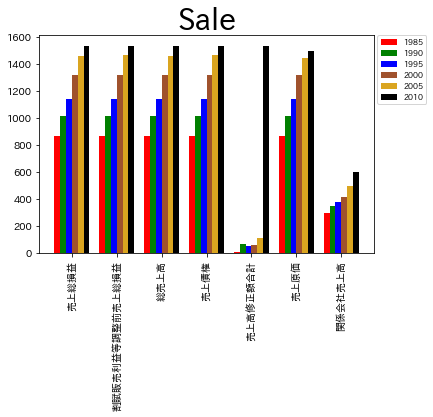

<Figure size 360x216 with 0 Axes>

In [17]:
left=np.arange(len(salenum85))
labels=saleitems
width=0.13
plt.bar(left-2*width,salenum85,color='red',width=width,align='center',label='1985')
plt.bar(left-width,salenum90,color='green',width=width,align='center',label='1990')
plt.bar(left,salenum95,color='blue',width=width,align='center',label='1995')
plt.bar(left+width,salenum00,color='sienna',width=width,align='center',label='2000')
plt.bar(left+2*width,salenum05,color='goldenrod',width=width,align='center',label='2005')
plt.bar(left+3*width,salenum10,color='black',width=width,align='center',label='2010')
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90)
plt.title('Sale',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(5,3))
plt.show()

I just get the figure prim and proper here and you have no need to figure out almost all commands. Then I'll repeat this process about the other items.
I believe someone other explains details about matplotlib somewhere and I omit it here.

In [18]:
expenseitems=['営業外費用','販売費及び一般管理費','その他営業外費用','未払費用','前払費用','その他一般管理費','長期前払費用','退職給付費用','経費','当期総製造費用','労務費','材料費','福利厚生費','荷造発送費','広告宣伝費']

In [19]:
DBJ85tosho1expense=tosho1_85.loc[:,expenseitems]
DBJ90tosho1expense=tosho1_90.loc[:,expenseitems]
DBJ95tosho1expense=tosho1_95.loc[:,expenseitems]
DBJ00tosho1expense=tosho1_00.loc[:,expenseitems]
DBJ05tosho1expense=tosho1_05.loc[:,expenseitems]
DBJ10tosho1expense=tosho1_10.loc[:,expenseitems]

In [20]:
expensenum85=[DBJ85tosho1expense[item].count() for item in expenseitems]
expensenum90=[DBJ90tosho1expense[item].count() for item in expenseitems]
expensenum95=[DBJ95tosho1expense[item].count() for item in expenseitems]
expensenum00=[DBJ00tosho1expense[item].count() for item in expenseitems]
expensenum05=[DBJ05tosho1expense[item].count() for item in expenseitems]
expensenum10=[DBJ10tosho1expense[item].count() for item in expenseitems]

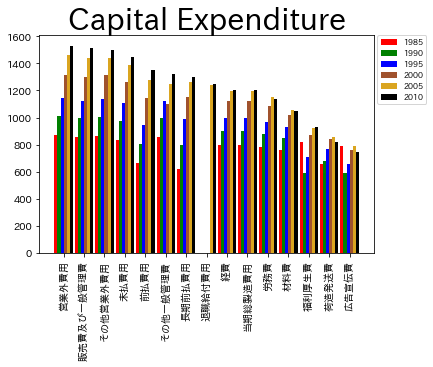

<Figure size 720x216 with 0 Axes>

In [21]:
left=np.arange(len(expensenum85))
labels=expenseitems
width=0.15
plt.bar(left-2*width,expensenum85,color='red',width=width,align='center',label='1985')
plt.bar(left-width,expensenum90,color='green',width=width,align='center',label='1990')
plt.bar(left,expensenum95,color='blue',width=width,align='center',label='1995')
plt.bar(left+width,expensenum00,color='sienna',width=width,align='center',label='2000')
plt.bar(left+2*width,expensenum05,color='goldenrod',width=width,align='center',label='2005')
plt.bar(left+3*width,expensenum10,color='black',width=width,align='center',label='2010')
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90)
plt.title('Capital Expenditure',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(10,3))
plt.show()

In [22]:
capexitems=['償却対象有形固定資産額','有形固定資産当期償却額','有形固定資産期末残高（取得価額ベース）','有形固定資産の減価償却方法','有形固定資産償却累計額','無形固定資産期末残高（取得価額ベース）','無形固定資産当期償却額','無形固定資産償却累計額','有形固定資産当期増加額','無形固定資産の減価償却方法','有形固定資産当期減少額','その他無形固定資産']

In [23]:
DBJ85tosho1capex=tosho1_85.loc[:,capexitems]
DBJ90tosho1capex=tosho1_90.loc[:,capexitems]
DBJ95tosho1capex=tosho1_95.loc[:,capexitems]
DBJ00tosho1capex=tosho1_00.loc[:,capexitems]
DBJ05tosho1capex=tosho1_05.loc[:,capexitems]
DBJ10tosho1capex=tosho1_10.loc[:,capexitems]

In [24]:
capexnum85=[DBJ85tosho1capex[item].count() for item in capexitems]
capexnum90=[DBJ90tosho1capex[item].count() for item in capexitems]
capexnum95=[DBJ95tosho1capex[item].count() for item in capexitems]
capexnum00=[DBJ00tosho1capex[item].count() for item in capexitems]
capexnum05=[DBJ05tosho1capex[item].count() for item in capexitems]
capexnum10=[DBJ10tosho1capex[item].count() for item in capexitems]

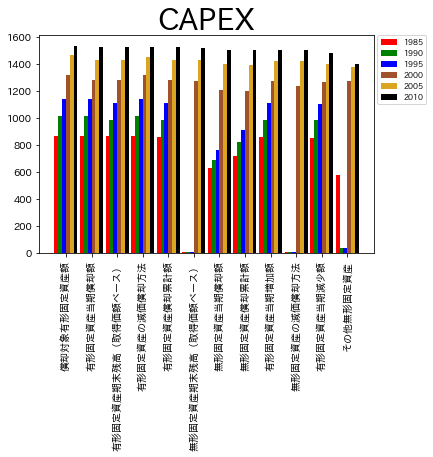

<Figure size 1080x216 with 0 Axes>

In [25]:
left=np.arange(len(capexnum85))
labels=capexitems
width=0.15
plt.bar(left-2*width,capexnum85,color='red',width=width,align='center',label='1985')
plt.bar(left-width,capexnum90,color='green',width=width,align='center',label='1990')
plt.bar(left,capexnum95,color='blue',width=width,align='center',label='1995')
plt.bar(left+width,capexnum00,color='sienna',width=width,align='center',label='2000')
plt.bar(left+2*width,capexnum05,color='goldenrod',width=width,align='center',label='2005')
plt.bar(left+3*width,capexnum10,color='black',width=width,align='center',label='2010')
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90)
plt.title('CAPEX',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(15,3))
plt.show()

In [26]:
otheritems=['研究開発費総額','期末従業員数(名)', '期末従業員数に含まれない臨時従業員･嘱託等（名）']

In [27]:
DBJ85tosho1other=tosho1_85.loc[:,otheritems]
DBJ90tosho1other=tosho1_90.loc[:,otheritems]
DBJ95tosho1other=tosho1_95.loc[:,otheritems]
DBJ00tosho1other=tosho1_00.loc[:,otheritems]
DBJ05tosho1other=tosho1_05.loc[:,otheritems]
DBJ10tosho1other=tosho1_10.loc[:,otheritems]

In [28]:
othernum85=[DBJ85tosho1other[item].count() for item in otheritems]
othernum90=[DBJ90tosho1other[item].count() for item in otheritems]
othernum95=[DBJ95tosho1other[item].count() for item in otheritems]
othernum00=[DBJ00tosho1other[item].count() for item in otheritems]
othernum05=[DBJ05tosho1other[item].count() for item in otheritems]
othernum10=[DBJ10tosho1other[item].count() for item in otheritems]

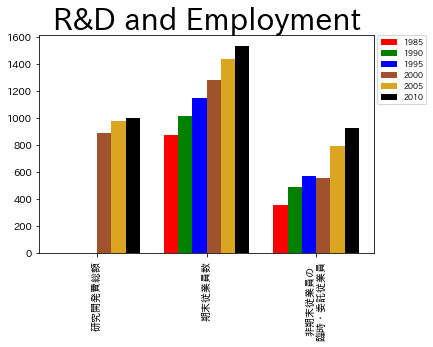

<Figure size 1080x216 with 0 Axes>

In [29]:
left=np.arange(len(othernum85))
labels=['研究開発費総額','期末従業員数','非期末従業員の\n臨時・委託従業員']
width=0.13
plt.bar(left-2*width,othernum85,color='red',width=width,align='center',label='1985')
plt.bar(left-width,othernum90,color='green',width=width,align='center',label='1990')
plt.bar(left,othernum95,color='blue',width=width,align='center',label='1995')
plt.bar(left+width,othernum00,color='sienna',width=width,align='center',label='2000')
plt.bar(left+2*width,othernum05,color='goldenrod',width=width,align='center',label='2005')
plt.bar(left+3*width,othernum10,color='black',width=width,align='center',label='2010')
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90)
plt.title('R&D and Employment',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(15,3))
plt.show()

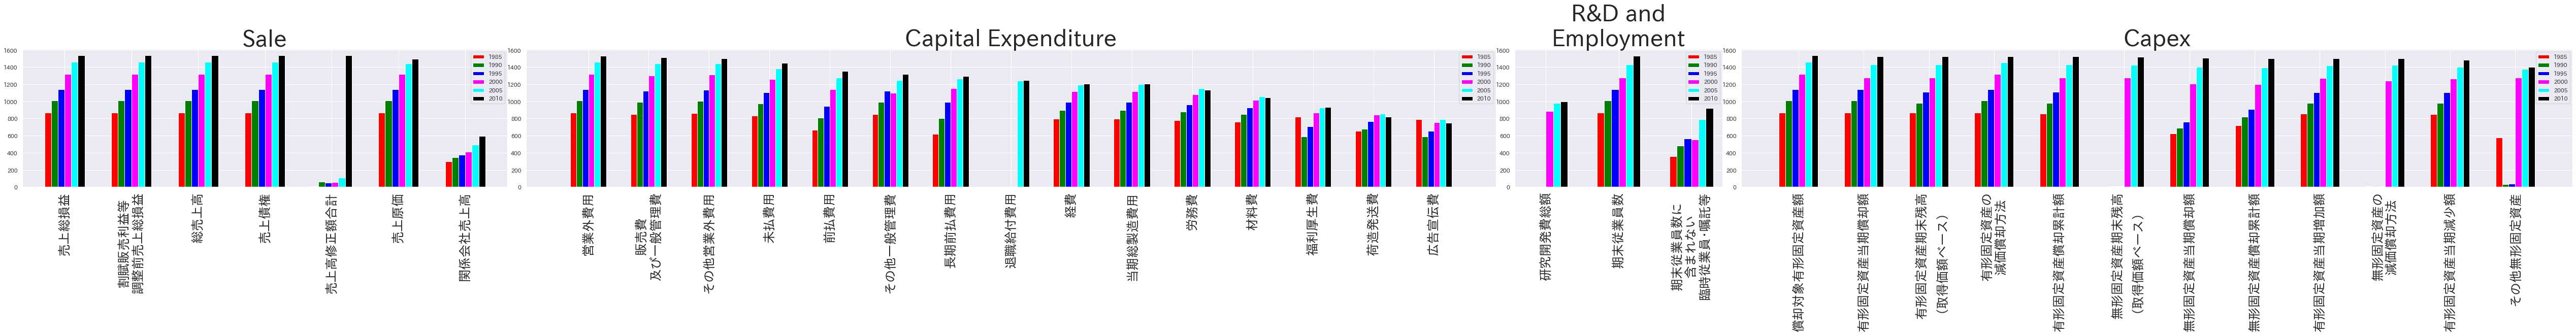

In [30]:
sns.set(font="IPAexGothic")
fig=plt.figure(figsize=(90,5))
spec=gridspec.GridSpec(ncols=4,nrows=1,width_ratios=[7,14,3,12])
plt.subplots_adjust(wspace=0.03,hspace=0)



x = np.array(['売上総損益', '割賦販売利益等\n調整前売上総損益', '総売上高', '売上債権', '売上高修正額合計', '売上原価', '関係会社売上高'])
x_position = np.arange(len(x))
sale85=salenum85
sale90=salenum90
sale95=salenum95
sale00=salenum00
sale05=salenum05
sale10=salenum10
ax1 = fig.add_subplot(spec[0])
ax1.bar(x_position, sale85, width=0.1, label='1985',color='red')
ax1.bar(x_position + 0.1, sale90, width=0.1, label='1990',color='green')
ax1.bar(x_position + 0.2, sale95, width=0.1, label='1995',color='blue')
ax1.bar(x_position + 0.3, sale00, width=0.1, label='2000',color='magenta')
ax1.bar(x_position + 0.4, sale05, width=0.1, label='2005',color='cyan')
ax1.bar(x_position + 0.5, sale10, width=0.1, label='2010',color='black')
ax1.legend()
ax1.set_xticks(x_position + 0.25)
ax1.set_xticklabels(x,rotation=90,fontsize=25)
ax1.set_title('Sale',fontsize=45)





x = np.array(['営業外費用','販売費\n及び一般管理費','その他営業外費用','未払費用','前払費用','その他一般管理費','長期前払費用','退職給付費用','経費','当期総製造費用','労務費','材料費','福利厚生費','荷造発送費','広告宣伝費'])
x_position = np.arange(len(x))
expense85=expensenum85
expense90=expensenum90
expense95=expensenum95
expense00=expensenum00
expense05=expensenum05
expense10=expensenum10
ax2 = fig.add_subplot(spec[1],sharey=ax1)
ax2.bar(x_position, expense85, width=0.1, label='1985',color='red')
ax2.bar(x_position + 0.1, expense90, width=0.1, label='1990',color='green')
ax2.bar(x_position + 0.2, expense95, width=0.1, label='1995',color='blue')
ax2.bar(x_position + 0.3, expense00, width=0.1, label='2000',color='magenta')
ax2.bar(x_position + 0.4, expense05, width=0.1, label='2005',color='cyan')
ax2.bar(x_position + 0.5, expense10, width=0.1, label='2010',color='black')
ax2.legend()
ax2.set_xticks(x_position + 0.25)
ax2.set_xticklabels(x,rotation=90,fontsize=25)
ax2.set_title('Capital Expenditure',fontsize=45)




x = np.array(['研究開発費総額', '期末従業員数', '期末従業員数に\n含まれない\n臨時従業員･嘱託等'])
x_position = np.arange(len(x))
other85=othernum85
other90=othernum90
other95=othernum95
other00=othernum00
other05=othernum05
other10=othernum10
ax3 = fig.add_subplot(spec[2],sharey=ax1)
ax3.bar(x_position, other85, width=0.1, label='1985',color='red')
ax3.bar(x_position + 0.1, other90, width=0.1, label='1990',color='green')
ax3.bar(x_position + 0.2, other95, width=0.1, label='1995',color='blue')
ax3.bar(x_position + 0.3, other00, width=0.1, label='2000',color='magenta')
ax3.bar(x_position + 0.4, other05, width=0.1, label='2005',color='cyan')
ax3.bar(x_position + 0.5, other10, width=0.1, label='2010',color='black')
ax3.legend()
ax3.set_xticks(x_position + 0.25)
ax3.set_xticklabels(x,rotation=90,fontsize=25)
ax3.set_title('R&D and\nEmployment',fontsize=45)




x = np.array(['償却対象有形固定資産額','有形固定資産当期償却額','有形固定資産期末残高\n（取得価額ベース）','有形固定資産の\n減価償却方法','有形固定資産償却累計額','無形固定資産期末残高\n（取得価額ベース）','無形固定資産当期償却額','無形固定資産償却累計額','有形固定資産当期増加額','無形固定資産の\n減価償却方法','有形固定資産当期減少額','その他無形固定資産'])
x_position = np.arange(len(x))
capex85=capexnum85
capex90=capexnum90
capex95=capexnum95
capex00=capexnum00
capex05=capexnum05
capex10=capexnum10
ax4 = fig.add_subplot(spec[3],sharey=ax1)
ax4.bar(x_position, capex85, width=0.1, label='1985',color='red')
ax4.bar(x_position + 0.1, capex90, width=0.1, label='1990',color='green')
ax4.bar(x_position + 0.2, capex95, width=0.1, label='1995',color='blue')
ax4.bar(x_position + 0.3, capex00, width=0.1, label='2000',color='magenta')
ax4.bar(x_position + 0.4, capex05, width=0.1, label='2005',color='cyan')
ax4.bar(x_position + 0.5, capex10, width=0.1, label='2010',color='black')
ax4.legend()
ax4.set_xticks(x_position + 0.25)
ax4.set_xticklabels(x,rotation=90,fontsize=25)
ax4.set_title('Capex',fontsize=45)
plt.show()

In [31]:
expenseitems1=expenseitems[:8]
expenseitems2=expenseitems[8:]
capexitems1=capexitems[:6]
capexitems2=capexitems[6:]
dat17['決算日'].min()

Timestamp('1956-04-30 00:00:00')

#From the last code cell, I figure out this DBJ data is tallied since 1956 and do the same to data arraging from 1960 through to 2010 every 5 years.

In [32]:
DBJ60 = dat17[(dat17['決算日']>=dt.datetime(1960,1,1))&(dat17['決算日']<=dt.datetime(1960,12,31))]
DBJ65 = dat17[(dat17['決算日']>=dt.datetime(1965,1,1))&(dat17['決算日']<=dt.datetime(1965,12,31))]
DBJ70 = dat17[(dat17['決算日']>=dt.datetime(1970,1,1))&(dat17['決算日']<=dt.datetime(1970,12,31))]
DBJ75 = dat17[(dat17['決算日']>=dt.datetime(1975,1,1))&(dat17['決算日']<=dt.datetime(1975,12,31))]
DBJ80 = dat17[(dat17['決算日']>=dt.datetime(1980,1,1))&(dat17['決算日']<=dt.datetime(1980,12,31))]
DBJ85 = dat17[(dat17['決算日']>=dt.datetime(1985,1,1))&(dat17['決算日']<=dt.datetime(1985,12,31))]
DBJ90 = dat17[(dat17['決算日']>=dt.datetime(1990,1,1))&(dat17['決算日']<=dt.datetime(1990,12,31))]
DBJ95 = dat17[(dat17['決算日']>=dt.datetime(1995,1,1))&(dat17['決算日']<=dt.datetime(1995,12,31))]
DBJ00 = dat17[(dat17['決算日']>=dt.datetime(2000,1,1))&(dat17['決算日']<=dt.datetime(2000,12,31))]
DBJ05 = dat17[(dat17['決算日']>=dt.datetime(2005,1,1))&(dat17['決算日']<=dt.datetime(2005,12,31))]
DBJ10 = dat17[(dat17['決算日']>=dt.datetime(2010,1,1))&(dat17['決算日']<=dt.datetime(2010,12,31))]
dat18=pd.read_table('stockcode2010.txt',sep=',')
code=dat18['証券コード'].tolist()

In [33]:
dcode60=DBJ60['株式銘柄ｺｰﾄﾞ'].tolist()
dcode65=DBJ65['株式銘柄ｺｰﾄﾞ'].tolist()
dcode70=DBJ70['株式銘柄ｺｰﾄﾞ'].tolist()
dcode75=DBJ75['株式銘柄ｺｰﾄﾞ'].tolist()
dcode80=DBJ80['株式銘柄ｺｰﾄﾞ'].tolist()
dcode85=DBJ85['株式銘柄ｺｰﾄﾞ'].tolist()
dcode90=DBJ90['株式銘柄ｺｰﾄﾞ'].tolist()
dcode95=DBJ95['株式銘柄ｺｰﾄﾞ'].tolist()
dcode00=DBJ00['株式銘柄ｺｰﾄﾞ'].tolist()
dcode05=DBJ05['株式銘柄ｺｰﾄﾞ'].tolist()
dcode10=DBJ10['株式銘柄ｺｰﾄﾞ'].tolist()
code60=[num for num in dcode60 if num in code]
code65=[num for num in dcode65 if num in code]
code70=[num for num in dcode70 if num in code]
code75=[num for num in dcode75 if num in code]
code80=[num for num in dcode80 if num in code]
code85=[num for num in dcode85 if num in code]
code90=[num for num in dcode90 if num in code]
code95=[num for num in dcode95 if num in code]
code00=[num for num in dcode00 if num in code]
code05=[num for num in dcode05 if num in code]
code10=[num for num in dcode10 if num in code]

In [34]:
tosho1_60=DBJ60[DBJ60['株式銘柄ｺｰﾄﾞ'].isin(code60)]
tosho1_65=DBJ65[DBJ65['株式銘柄ｺｰﾄﾞ'].isin(code65)]
tosho1_70=DBJ70[DBJ70['株式銘柄ｺｰﾄﾞ'].isin(code70)]
tosho1_75=DBJ75[DBJ75['株式銘柄ｺｰﾄﾞ'].isin(code75)]
tosho1_80=DBJ80[DBJ80['株式銘柄ｺｰﾄﾞ'].isin(code80)]
tosho1_85=DBJ85[DBJ85['株式銘柄ｺｰﾄﾞ'].isin(code85)]
tosho1_90=DBJ90[DBJ90['株式銘柄ｺｰﾄﾞ'].isin(code90)]
tosho1_95=DBJ95[DBJ95['株式銘柄ｺｰﾄﾞ'].isin(code95)]
tosho1_00=DBJ00[DBJ00['株式銘柄ｺｰﾄﾞ'].isin(code00)]
tosho1_05=DBJ05[DBJ05['株式銘柄ｺｰﾄﾞ'].isin(code05)]
tosho1_10=DBJ10[DBJ10['株式銘柄ｺｰﾄﾞ'].isin(code10)]

In [35]:
DBJ60tosho1sale=tosho1_60.loc[:,saleitems]
DBJ65tosho1sale=tosho1_65.loc[:,saleitems]
DBJ70tosho1sale=tosho1_70.loc[:,saleitems]
DBJ75tosho1sale=tosho1_75.loc[:,saleitems]
DBJ80tosho1sale=tosho1_80.loc[:,saleitems]
DBJ85tosho1sale=tosho1_85.loc[:,saleitems]
DBJ90tosho1sale=tosho1_90.loc[:,saleitems]
DBJ95tosho1sale=tosho1_95.loc[:,saleitems]
DBJ00tosho1sale=tosho1_00.loc[:,saleitems]
DBJ05tosho1sale=tosho1_05.loc[:,saleitems]
DBJ10tosho1sale=tosho1_10.loc[:,saleitems]
DBJ60tosho1expense=tosho1_60.loc[:,expenseitems]
DBJ65tosho1expense=tosho1_65.loc[:,expenseitems]
DBJ70tosho1expense=tosho1_70.loc[:,expenseitems]
DBJ75tosho1expense=tosho1_75.loc[:,expenseitems]
DBJ80tosho1expense=tosho1_80.loc[:,expenseitems]
DBJ85tosho1expense=tosho1_85.loc[:,expenseitems]
DBJ90tosho1expense=tosho1_90.loc[:,expenseitems]
DBJ95tosho1expense=tosho1_95.loc[:,expenseitems]
DBJ00tosho1expense=tosho1_00.loc[:,expenseitems]
DBJ05tosho1expense=tosho1_05.loc[:,expenseitems]
DBJ10tosho1expense=tosho1_10.loc[:,expenseitems]
DBJ60tosho1capex=tosho1_60.loc[:,capexitems]
DBJ65tosho1capex=tosho1_65.loc[:,capexitems]
DBJ70tosho1capex=tosho1_70.loc[:,capexitems]
DBJ75tosho1capex=tosho1_75.loc[:,capexitems]
DBJ80tosho1capex=tosho1_80.loc[:,capexitems]
DBJ85tosho1capex=tosho1_85.loc[:,capexitems]
DBJ90tosho1capex=tosho1_90.loc[:,capexitems]
DBJ95tosho1capex=tosho1_95.loc[:,capexitems]
DBJ00tosho1capex=tosho1_00.loc[:,capexitems]
DBJ05tosho1capex=tosho1_05.loc[:,capexitems]
DBJ10tosho1capex=tosho1_10.loc[:,capexitems]
DBJ60tosho1other=tosho1_60.loc[:,otheritems]
DBJ65tosho1other=tosho1_65.loc[:,otheritems]
DBJ70tosho1other=tosho1_70.loc[:,otheritems]
DBJ75tosho1other=tosho1_75.loc[:,otheritems]
DBJ80tosho1other=tosho1_80.loc[:,otheritems]
DBJ85tosho1other=tosho1_85.loc[:,otheritems]
DBJ90tosho1other=tosho1_90.loc[:,otheritems]
DBJ95tosho1other=tosho1_95.loc[:,otheritems]
DBJ00tosho1other=tosho1_00.loc[:,otheritems]
DBJ05tosho1other=tosho1_05.loc[:,otheritems]
DBJ10tosho1other=tosho1_10.loc[:,otheritems]

In [36]:
salenum60=[DBJ60tosho1sale[item].count() for item in saleitems]
salenum65=[DBJ65tosho1sale[item].count() for item in saleitems]
salenum70=[DBJ70tosho1sale[item].count() for item in saleitems]
salenum75=[DBJ75tosho1sale[item].count() for item in saleitems]
salenum80=[DBJ80tosho1sale[item].count() for item in saleitems]
salenum85=[DBJ85tosho1sale[item].count() for item in saleitems]
salenum90=[DBJ90tosho1sale[item].count() for item in saleitems]
salenum95=[DBJ95tosho1sale[item].count() for item in saleitems]
salenum00=[DBJ00tosho1sale[item].count() for item in saleitems]
salenum05=[DBJ05tosho1sale[item].count() for item in saleitems]
salenum10=[DBJ10tosho1sale[item].count() for item in saleitems]
expensenum60_1=[DBJ60tosho1expense[item].count() for item in expenseitems1]
expensenum65_1=[DBJ65tosho1expense[item].count() for item in expenseitems1]
expensenum70_1=[DBJ70tosho1expense[item].count() for item in expenseitems1]
expensenum75_1=[DBJ75tosho1expense[item].count() for item in expenseitems1]
expensenum80_1=[DBJ80tosho1expense[item].count() for item in expenseitems1]
expensenum85_1=[DBJ85tosho1expense[item].count() for item in expenseitems1]
expensenum90_1=[DBJ90tosho1expense[item].count() for item in expenseitems1]
expensenum95_1=[DBJ95tosho1expense[item].count() for item in expenseitems1]
expensenum00_1=[DBJ00tosho1expense[item].count() for item in expenseitems1]
expensenum05_1=[DBJ05tosho1expense[item].count() for item in expenseitems1]
expensenum10_1=[DBJ10tosho1expense[item].count() for item in expenseitems1]
expensenum60_2=[DBJ60tosho1expense[item].count() for item in expenseitems2]
expensenum65_2=[DBJ65tosho1expense[item].count() for item in expenseitems2]
expensenum70_2=[DBJ70tosho1expense[item].count() for item in expenseitems2]
expensenum75_2=[DBJ75tosho1expense[item].count() for item in expenseitems2]
expensenum80_2=[DBJ80tosho1expense[item].count() for item in expenseitems2]
expensenum85_2=[DBJ85tosho1expense[item].count() for item in expenseitems2]
expensenum90_2=[DBJ90tosho1expense[item].count() for item in expenseitems2]
expensenum95_2=[DBJ95tosho1expense[item].count() for item in expenseitems2]
expensenum00_2=[DBJ00tosho1expense[item].count() for item in expenseitems2]
expensenum05_2=[DBJ05tosho1expense[item].count() for item in expenseitems2]
expensenum10_2=[DBJ10tosho1expense[item].count() for item in expenseitems2]
capexnum60_1=[DBJ60tosho1capex[item].count() for item in capexitems1]
capexnum65_1=[DBJ65tosho1capex[item].count() for item in capexitems1]
capexnum70_1=[DBJ70tosho1capex[item].count() for item in capexitems1]
capexnum75_1=[DBJ75tosho1capex[item].count() for item in capexitems1]
capexnum80_1=[DBJ80tosho1capex[item].count() for item in capexitems1]
capexnum85_1=[DBJ85tosho1capex[item].count() for item in capexitems1]
capexnum90_1=[DBJ90tosho1capex[item].count() for item in capexitems1]
capexnum95_1=[DBJ95tosho1capex[item].count() for item in capexitems1]
capexnum00_1=[DBJ00tosho1capex[item].count() for item in capexitems1]
capexnum05_1=[DBJ05tosho1capex[item].count() for item in capexitems1]
capexnum10_1=[DBJ10tosho1capex[item].count() for item in capexitems1]
capexnum60_2=[DBJ60tosho1capex[item].count() for item in capexitems2]
capexnum65_2=[DBJ65tosho1capex[item].count() for item in capexitems2]
capexnum70_2=[DBJ70tosho1capex[item].count() for item in capexitems2]
capexnum75_2=[DBJ75tosho1capex[item].count() for item in capexitems2]
capexnum80_2=[DBJ80tosho1capex[item].count() for item in capexitems2]
capexnum85_2=[DBJ85tosho1capex[item].count() for item in capexitems2]
capexnum90_2=[DBJ90tosho1capex[item].count() for item in capexitems2]
capexnum95_2=[DBJ95tosho1capex[item].count() for item in capexitems2]
capexnum00_2=[DBJ00tosho1capex[item].count() for item in capexitems2]
capexnum05_2=[DBJ05tosho1capex[item].count() for item in capexitems2]
capexnum10_2=[DBJ10tosho1capex[item].count() for item in capexitems2]
othernum60=[DBJ60tosho1other[item].count() for item in otheritems]
othernum65=[DBJ65tosho1other[item].count() for item in otheritems]
othernum70=[DBJ70tosho1other[item].count() for item in otheritems]
othernum75=[DBJ75tosho1other[item].count() for item in otheritems]
othernum80=[DBJ80tosho1other[item].count() for item in otheritems]
othernum85=[DBJ85tosho1other[item].count() for item in otheritems]
othernum90=[DBJ90tosho1other[item].count() for item in otheritems]
othernum95=[DBJ95tosho1other[item].count() for item in otheritems]
othernum00=[DBJ00tosho1other[item].count() for item in otheritems]
othernum05=[DBJ05tosho1other[item].count() for item in otheritems]
othernum10=[DBJ10tosho1other[item].count() for item in otheritems]

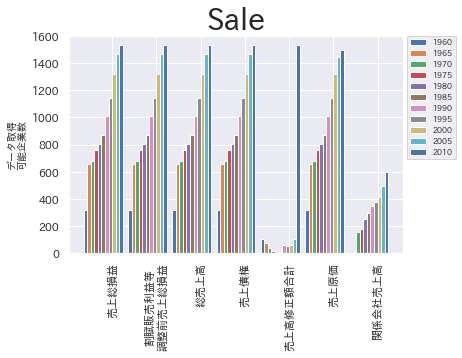

<Figure size 5760x216 with 0 Axes>

In [37]:
saleitemsRN=saleitems
saleitemsRN[1]='割賦販売利益等\n調整前売上総損益'
left=np.arange(len(salenum85))
labels=saleitemsRN
width=0.08
plt.bar(left-5*width,salenum60,width=width,align='center',label='1960')
plt.bar(left-4*width,salenum65,width=width,align='center',label='1965')
plt.bar(left-3*width,salenum70,width=width,align='center',label='1970')
plt.bar(left-2*width,salenum75,width=width,align='center',label='1975')
plt.bar(left-width,salenum80,width=width,align='center',label='1980')
plt.bar(left,salenum85,width=width,align='center',label='1985')
plt.bar(left+width,salenum90,width=width,align='center',label='1990')
plt.bar(left+2*width,salenum95,width=width,align='center',label='1995')
plt.bar(left+3*width,salenum00,width=width,align='center',label='2000')
plt.bar(left+4*width,salenum05,width=width,align='center',label='2005')
plt.bar(left+5*width,salenum10,width=width,align='center',label='2010')
plt.ylabel('データ取得\n可能企業数',fontsize=10)
plt.ylim(0,1600)
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+5*width/2,labels,rotation=90)
plt.title('Sale',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(80,3))
plt.show()

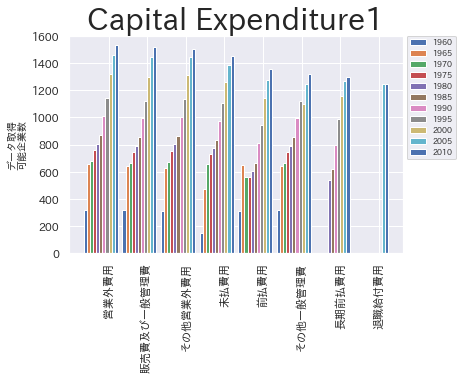

<Figure size 4320x216 with 0 Axes>

In [38]:
left=np.arange(len(expensenum85_1))
labels=expenseitems1
width=0.08
plt.bar(left-5*width,expensenum60_1,width=width,align='center',label='1960')
plt.bar(left-4*width,expensenum65_1,width=width,align='center',label='1965')
plt.bar(left-3*width,expensenum70_1,width=width,align='center',label='1970')
plt.bar(left-2*width,expensenum75_1,width=width,align='center',label='1975')
plt.bar(left-width,expensenum80_1,width=width,align='center',label='1980')
plt.bar(left,expensenum85_1,width=width,align='center',label='1985')
plt.bar(left+width,expensenum90_1,width=width,align='center',label='1990')
plt.bar(left+2*width,expensenum95_1,width=width,align='center',label='1995')
plt.bar(left+3*width,expensenum00_1,width=width,align='center',label='2000')
plt.bar(left+4*width,expensenum05_1,width=width,align='center',label='2005')
plt.bar(left+5*width,expensenum10_1,width=width,align='center',label='2010')
plt.ylabel('データ取得\n可能企業数',fontsize=10)
plt.ylim(0,1600)
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+5*width/2,labels,rotation=90)
plt.title('Capital Expenditure1',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(60,3))
plt.show()

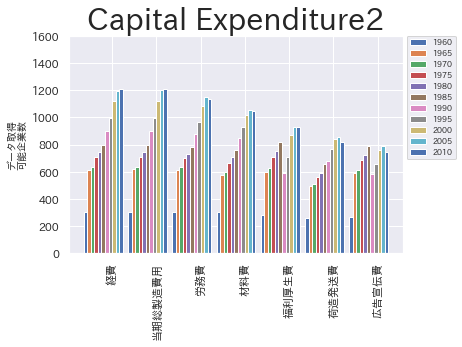

<Figure size 4320x216 with 0 Axes>

In [39]:
left=np.arange(len(expensenum85_2))
labels=expenseitems2
width=0.08
plt.bar(left-5*width,expensenum60_2,width=width,align='center',label='1960')
plt.bar(left-4*width,expensenum65_2,width=width,align='center',label='1965')
plt.bar(left-3*width,expensenum70_2,width=width,align='center',label='1970')
plt.bar(left-2*width,expensenum75_2,width=width,align='center',label='1975')
plt.bar(left-width,expensenum80_2,width=width,align='center',label='1980')
plt.bar(left,expensenum85_2,width=width,align='center',label='1985')
plt.bar(left+width,expensenum90_2,width=width,align='center',label='1990')
plt.bar(left+2*width,expensenum95_2,width=width,align='center',label='1995')
plt.bar(left+3*width,expensenum00_2,width=width,align='center',label='2000')
plt.bar(left+4*width,expensenum05_2,width=width,align='center',label='2005')
plt.bar(left+5*width,expensenum10_2,width=width,align='center',label='2010')
plt.ylabel('データ取得\n可能企業数',fontsize=10)
plt.ylim(0,1600)
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+5*width/2,labels,rotation=90)
plt.title('Capital Expenditure2',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(60,3))
plt.show()

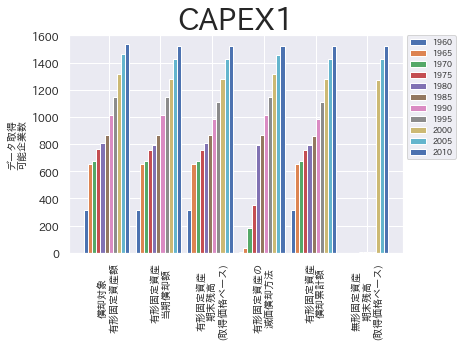

<Figure size 2880x216 with 0 Axes>

In [40]:
capexitems1RN=['償却対象\n有形固定資産額','有形固定資産\n当期償却額','有形固定資産\n期末残高\n(取得価格ベース)','有形固定資産の\n減価償却方法','有形固定資産\n償却累計額','無形固定資産\n期末残高\n(取得価格ベース)']
left=np.arange(len(capexnum85_1))
labels=capexitems1RN
width=0.08
plt.bar(left-5*width,capexnum60_1,width=width,align='center',label='1960')
plt.bar(left-4*width,capexnum65_1,width=width,align='center',label='1965')
plt.bar(left-3*width,capexnum70_1,width=width,align='center',label='1970')
plt.bar(left-2*width,capexnum75_1,width=width,align='center',label='1975')
plt.bar(left-width,capexnum80_1,width=width,align='center',label='1980')
plt.bar(left,capexnum85_1,width=width,align='center',label='1985')
plt.bar(left+width,capexnum90_1,width=width,align='center',label='1990')
plt.bar(left+2*width,capexnum95_1,width=width,align='center',label='1995')
plt.bar(left+3*width,capexnum00_1,width=width,align='center',label='2000')
plt.bar(left+4*width,capexnum05_1,width=width,align='center',label='2005')
plt.bar(left+5*width,capexnum10_1,width=width,align='center',label='2010')
plt.ylabel('データ取得\n可能企業数',fontsize=10)
plt.ylim(0,1600)
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90,fontsize=10)
plt.title('CAPEX1',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(40,3))
plt.show()

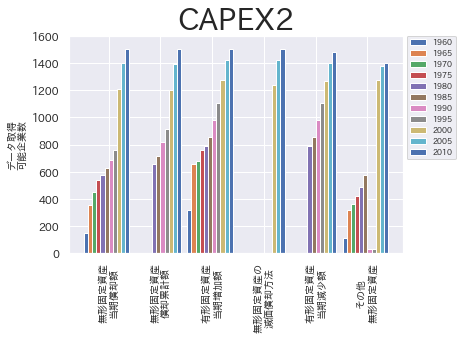

<Figure size 2880x216 with 0 Axes>

In [41]:
capexitems2RN=['無形固定資産\n当期償却額','無形固定資産\n償却累計額','有形固定資産\n当期増加額','無形固定資産の\n減価償却方法','有形固定資産\n当期減少額','その他\n無形固定資産']
left=np.arange(len(capexnum85_2))
labels=capexitems2RN
width=0.08
plt.bar(left-5*width,capexnum60_2,width=width,align='center',label='1960')
plt.bar(left-4*width,capexnum65_2,width=width,align='center',label='1965')
plt.bar(left-3*width,capexnum70_2,width=width,align='center',label='1970')
plt.bar(left-2*width,capexnum75_2,width=width,align='center',label='1975')
plt.bar(left-width,capexnum80_2,width=width,align='center',label='1980')
plt.bar(left,capexnum85_2,width=width,align='center',label='1985')
plt.bar(left+width,capexnum90_2,width=width,align='center',label='1990')
plt.bar(left+2*width,capexnum95_2,width=width,align='center',label='1995')
plt.bar(left+3*width,capexnum00_2,width=width,align='center',label='2000')
plt.bar(left+4*width,capexnum05_2,width=width,align='center',label='2005')
plt.bar(left+5*width,capexnum10_2,width=width,align='center',label='2010')
plt.ylabel('データ取得\n可能企業数',fontsize=10)
plt.ylim(0,1600)
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=8)
plt.xticks(left+width/2,labels,rotation=90,fontsize=10)
plt.title('CAPEX2',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(40,3))
plt.show()

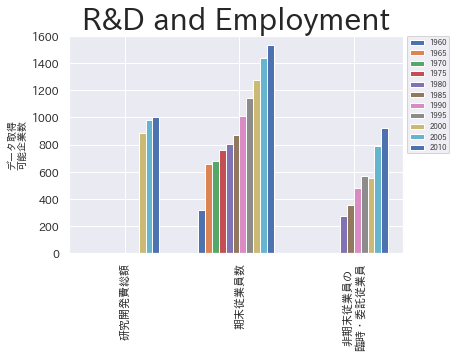

<Figure size 2160x216 with 0 Axes>

In [42]:
left=np.arange(len(othernum85))
labels=['研究開発費総額','期末従業員数','非期末従業員の\n臨時・委託従業員']
width=0.06
plt.bar(left-5*width,othernum60,width=width,align='center',label='1960')
plt.bar(left-4*width,othernum65,width=width,align='center',label='1965')
plt.bar(left-3*width,othernum70,width=width,align='center',label='1970')
plt.bar(left-2*width,othernum75,width=width,align='center',label='1975')
plt.bar(left-width,othernum80,width=width,align='center',label='1980')
plt.bar(left,othernum85,width=width,align='center',label='1985')
plt.bar(left+width,othernum90,width=width,align='center',label='1990')
plt.bar(left+2*width,othernum95,width=width,align='center',label='1995')
plt.bar(left+3*width,othernum00,width=width,align='center',label='2000')
plt.bar(left+4*width,othernum05,width=width,align='center',label='2005')
plt.bar(left+5*width,othernum10,width=width,align='center',label='2010')
plt.ylabel('データ取得\n可能企業数',fontsize=10)
plt.ylim(0,1600)
plt.legend(bbox_to_anchor=(1.01,1),loc='upper left',borderaxespad=0,fontsize=7)
plt.xticks(left+width/2,labels,rotation=90)
plt.title('R&D and Employment',x=0.5,y=1,fontsize=30)
plt.figure(figsize=(30,3))
plt.show()